# Partie sur la prediction des données

## Classification des elections du second tour 2022 Par Departement

### Bibliothèque utilisée

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

### Chargement du dataset

In [2]:
#Chargement du dataset
df_concat = pd.read_excel('Departement.xlsx')
print(df_concat)

                Departement  nbPersonne     Macron      Lepen  niveauEtude  \
0                       Ain      671937  50.982366  49.017659         41.4   
1                     Aisne      522791  38.089161  61.910914         29.7   
2                    Allier      332443  48.201987  51.798013         33.4   
3   Alpes-de-Haute-Provence      166654  47.890556  52.109697         37.2   
4              Hautes-Alpes      139942  53.414383  46.585802         41.7   
..                      ...         ...        ...        ...          ...   
89    Territoire de Belfort      136891  45.499208  54.500792         43.3   
90                  Essonne     1316053  58.871340  41.128711         47.5   
91           Hauts-de-Seine     1642002  80.148611  19.851389         71.1   
92             Val-de-Marne     1426748  71.616596  28.383404         56.1   
93               Val-d'Oise     1274374  58.109402  41.890707         45.2   

    tauxChomage  Proximité    Immigré  
0           5.5       1

### Normalisation des données

In [3]:
# Sélection des features
features = df_concat.drop(['Departement','Macron', 'Lepen'], axis=1)
y = [0 if x <= 50 else 1 for x in df_concat['Macron']]

#definition des labels
target_names = ['Lepen', 'Macron']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

### Selection des colonnes pertinantes

In [4]:
import statsmodels.api as sm

#creation de l'analyse pour la p_value
features_with_const = sm.add_constant(X_scaled)
logit_model = sm.Logit(y, features_with_const)
result = logit_model.fit()
print(result.summary())

#Selection des p_value interessant
significant_indices = np.where(result.pvalues < 0.05)[0]
significant_indices =significant_indices[1:] - 1
#print(significant_indices)
X_scaled = X_scaled[:, significant_indices]
print("Affichage des colonnes selectionné : ",features.iloc[:, significant_indices].columns)

Optimization terminated successfully.
         Current function value: 0.414876
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   94
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                  0.4015
Time:                        14:30:05   Log-Likelihood:                -38.998
converged:                       True   LL-Null:                       -65.156
Covariance Type:            nonrobust   LLR p-value:                 4.649e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.303      0.380      0.704      -0.479       0.710
x1            -1.2300      0.

### division des données

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Application de SVM, en faisant du copier coller du tp8

In [6]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear, target_names=target_names))


correlation, p_value = pearsonr(y_test, y_pred_linear)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

       Lepen       0.89      0.89      0.89         9
      Macron       0.90      0.90      0.90        10

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19

Corrélation entre les valeurs réelles et prédites : 0.7888888888888889
P-value associée : 5.96517043674751e-05
R-value : 0.5777777777777778


In [7]:
svm_linear = SVC(kernel='poly')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred_linear)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_linear))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

       Lepen       0.64      1.00      0.78         9
      Macron       1.00      0.50      0.67        10

    accuracy                           0.74        19
   macro avg       0.82      0.75      0.72        19
weighted avg       0.83      0.74      0.72        19

Corrélation entre les valeurs réelles et prédites : 0.5669467095138407
P-value associée : 0.011365199600375858
R-value : -0.05555555555555536


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("Meilleurs paramètres pour SVM:", grid_search.best_params_)
print("Performance du SVM avec les meilleurs paramètres :")

print(classification_report(y_test, y_pred_best, target_names=target_names))
correlation, p_value = pearsonr(y_test, y_pred_best)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_best))

Meilleurs paramètres pour SVM: {'C': 10, 'gamma': 0.1}
Performance du SVM avec les meilleurs paramètres :
              precision    recall  f1-score   support

       Lepen       0.82      1.00      0.90         9
      Macron       1.00      0.80      0.89        10

    accuracy                           0.89        19
   macro avg       0.91      0.90      0.89        19
weighted avg       0.91      0.89      0.89        19

Corrélation entre les valeurs réelles et prédites : 0.8090398349558904
P-value associée : 2.737107793791007e-05
R-value : 0.5777777777777778


### Application de Regression

In [9]:
# régression logistique
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

       Lepen       0.86      0.67      0.75         9
      Macron       0.75      0.90      0.82        10

    accuracy                           0.79        19
   macro avg       0.80      0.78      0.78        19
weighted avg       0.80      0.79      0.79        19

Corrélation entre les valeurs réelles et prédites : 0.5865557254410009
P-value associée : 0.008297696010706056
R-value : 0.15555555555555567


In [10]:
# Classifier using Ridge regression
from sklearn.linear_model import RidgeClassifier

ridgeClf = RidgeClassifier()
ridgeClf.fit(X_train, y_train)

y_pred = ridgeClf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

       Lepen       0.88      0.78      0.82         9
      Macron       0.82      0.90      0.86        10

    accuracy                           0.84        19
   macro avg       0.85      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19

Corrélation entre les valeurs réelles et prédites : 0.6854365268376296
P-value associée : 0.001199285777239622
R-value : 0.3666666666666667


In [11]:
from sklearn.linear_model import SGDClassifier
#Linear classifiers (SVM, logistic regression, etc.) with SGD training.

sgdClf = SGDClassifier()
sgdClf.fit(X_train, y_train)

y_pred = sgdClf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))


correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

       Lepen       0.64      0.78      0.70         9
      Macron       0.75      0.60      0.67        10

    accuracy                           0.68        19
   macro avg       0.69      0.69      0.68        19
weighted avg       0.70      0.68      0.68        19

Corrélation entre les valeurs réelles et prédites : 0.38204658872917047
P-value associée : 0.10649058312077657
R-value : -0.2666666666666666


### Application de Foret aléatoire

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=1000, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_forest = forest_model.predict(X_test)

print(classification_report(y_test, y_pred_forest, target_names=target_names))

correlation, p_value = pearsonr(y_test, y_pred_forest)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred_forest))

              precision    recall  f1-score   support

       Lepen       0.80      0.89      0.84         9
      Macron       0.89      0.80      0.84        10

    accuracy                           0.84        19
   macro avg       0.84      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19

Corrélation entre les valeurs réelles et prédites : 0.6888888888888887
P-value associée : 0.0011064898031728446
R-value : 0.3666666666666667


### Reseau de neuronne

In [13]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np

X_trainNN = np.array(X_train)
y_trainNN = np.array(y_train)
X_valNN, X_testNN = train_test_split(X_test, test_size=0.5, random_state=42)
y_valNN, y_testNN = train_test_split(y_test, test_size=0.5, random_state=42)

X_valNN = np.array(X_valNN)
y_valNN = np.array(y_valNN)

X_testNN = np.array(X_testNN)
y_testNN = np.array(y_testNN)

CallBackSave = callbacks.ModelCheckpoint("best_model_classe.keras", 
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
                                                 mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=70)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(features.shape[1], activation='relu'),
    tf.keras.layers.Dense(int(features.shape[1]*3/4), activation='relu'),
    tf.keras.layers.Dense(int(features.shape[1]/2), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])     

history = model.fit(X_trainNN, y_trainNN,
                    epochs=1000,validation_data=(X_valNN, y_valNN),
                    callbacks=[CallBackSave,callbackStop]
                   )


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4827 - loss: 0.6894 - val_accuracy: 0.3333 - val_loss: 0.7453
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5155 - loss: 0.6897 - val_accuracy: 0.3333 - val_loss: 0.7439
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5534 - loss: 0.6797 - val_accuracy: 0.3333 - val_loss: 0.7427
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5468 - loss: 0.6809 - val_accuracy: 0.3333 - val_loss: 0.7412
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5272 - loss: 0.6794 - val_accuracy: 0.3333 - val_loss: 0.7394
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5468 - loss: 0.6819 - val_accuracy: 0.4444 - val_loss: 0.7376
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5507 - loss: 0.6770 - val_accuracy: 0.4444 - val_loss: 0.7358
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5757 - loss: 0.6770 - val_accuracy: 0.4444 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6994 - loss: 0.6318 - val_accuracy: 0.5556 - val_loss: 0.6782
Epoch 52/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6525 - loss: 0.6357 - val_accuracy: 0.5556 - val_loss: 0.6767
Epoch 53/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6720 - loss: 0.6307 - val_accuracy: 0.5556 - val_loss: 0.6752
Epoch 54/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6798 - loss: 0.6386 - val_accuracy: 0.5556 - val_loss: 0.6737
Epoch 55/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6916 - loss: 0.6331 - val_accuracy: 0.5556 - val_loss: 0.6722
Epoch 56/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6720 - loss: 0.6306 - val_accuracy: 0.5556 - val_loss: 0.6707
Epoch 57/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6904 - loss: 0.6337 - val_accuracy: 0.5556 - val_loss: 0.6692
Epoch 58/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7021 - loss: 0.6197 - val_accuracy: 0.5556 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7350 - loss: 0.6025 - val_accuracy: 0.7778 - val_loss: 0.6237
Epoch 102/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7272 - loss: 0.6025 - val_accuracy: 0.7778 - val_loss: 0.6226
Epoch 103/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6920 - loss: 0.6092 - val_accuracy: 0.7778 - val_loss: 0.6212
Epoch 104/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7389 - loss: 0.5950 - val_accuracy: 0.7778 - val_loss: 0.6199
Epoch 105/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7116 - loss: 0.5999 - val_accuracy: 0.7778 - val_loss: 0.6186
Epoch 106/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7116 - loss: 0.5970 - val_accuracy: 0.7778 - val_loss: 0.6172
Epoch 107/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7233 - loss: 0.5932 - val_accuracy: 0.7778 - val_loss: 0.6158
Epoch 108/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7389 - loss: 0.5799 - val_accuracy: 0.7778 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7049 - loss: 0.5510 - val_accuracy: 0.5556 - val_loss: 0.5878
Epoch 152/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7272 - loss: 0.5690 - val_accuracy: 0.5556 - val_loss: 0.5872
Epoch 153/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7038 - loss: 0.5872 - val_accuracy: 0.5556 - val_loss: 0.5864
Epoch 154/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7272 - loss: 0.5639 - val_accuracy: 0.5556 - val_loss: 0.5859
Epoch 155/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6842 - loss: 0.5833 - val_accuracy: 0.5556 - val_loss: 0.5852
Epoch 156/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7506 - loss: 0.5577 - val_accuracy: 0.5556 - val_loss: 0.5846
Epoch 157/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7311 - loss: 0.5687 - val_accuracy: 0.5556 - val_loss: 0.5842
Epoch 158/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7428 - loss: 0.5542 - val_accuracy: 0.5556 - v

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7667 - loss: 0.5105 - val_accuracy: 0.5556 - val_loss: 0.4945
Epoch 202/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7862 - loss: 0.4920 - val_accuracy: 0.6667 - val_loss: 0.4913
Epoch 203/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7745 - loss: 0.4945 - val_accuracy: 0.6667 - val_loss: 0.4886
Epoch 204/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7472 - loss: 0.5227 - val_accuracy: 0.6667 - val_loss: 0.4863
Epoch 205/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7511 - loss: 0.5094 - val_accuracy: 0.6667 - val_loss: 0.4836
Epoch 206/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7433 - loss: 0.5139 - val_accuracy: 0.6667 - val_loss: 0.4779
Epoch 207/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7745 - loss: 0.4900 - val_accuracy: 0.6667 - val_loss: 0.4725
Epoch 208/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7394 - loss: 0.5073 - val_accuracy: 0.6667 - val_lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 0.4659 - val_accuracy: 0.8889 - val_loss: 0.3829
Epoch 252/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8219 - loss: 0.4322 - val_accuracy: 0.8889 - val_loss: 0.3830
Epoch 253/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8141 - loss: 0.4315 - val_accuracy: 0.8889 - val_loss: 0.3834
Epoch 254/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 0.4672 - val_accuracy: 0.8889 - val_loss: 0.3836
Epoch 255/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7789 - loss: 0.4839 - val_accuracy: 0.8889 - val_loss: 0.3838
Epoch 256/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8062 - loss: 0.4560 - val_accuracy: 0.8889 - val_loss: 0.3836
Epoch 257/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8258 - loss: 0.4326 - val_accuracy: 0.8889 - val_loss: 0.3830
Epoch 258/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8219 - loss: 0.4254 - val_accuracy: 0.8889 - val_loss

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7711 - loss: 0.4718 - val_accuracy: 0.8889 - val_loss: 0.3812
Epoch 302/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8297 - loss: 0.4149 - val_accuracy: 0.8889 - val_loss: 0.3801
Epoch 303/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8219 - loss: 0.4452 - val_accuracy: 0.8889 - val_loss: 0.3792
Epoch 304/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8062 - loss: 0.4466 - val_accuracy: 0.8889 - val_loss: 0.3787
Epoch 305/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7984 - loss: 0.4432 - val_accuracy: 0.8889 - val_loss: 0.3782
Epoch 306/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8102 - loss: 0.4439 - val_accuracy: 0.8889 - val_loss: 0.3771
Epoch 307/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7516 - loss: 0.5061 - val_accuracy: 0.8889 - val_loss: 0.3762
Epoch 308/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7867 - loss: 0.4526 - val_accuracy: 0.8889 - val_los

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7828 - loss: 0.4727 - val_accuracy: 0.8889 - val_loss: 0.3785
Epoch 352/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8297 - loss: 0.3893 - val_accuracy: 0.8889 - val_loss: 0.3784
Epoch 353/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7984 - loss: 0.4423 - val_accuracy: 0.8889 - val_loss: 0.3787
Epoch 354/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8062 - loss: 0.4314 - val_accuracy: 0.8889 - val_loss: 0.3790
Epoch 355/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.4724 - val_accuracy: 0.8889 - val_loss: 0.3795
Epoch 356/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.4391 - val_accuracy: 0.8889 - val_loss: 0.3796
Epoch 357/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 0.4168 - val_accuracy: 0.8889 - val_loss: 0.3798
Epoch 358/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8023 - loss: 0.4290 - val_accuracy: 0.8889 - val_loss

In [14]:
best_model = tf.keras.models.load_model("best_model_classe.keras")

y_pred_NN = best_model.predict(X_testNN)
y_pred_binary = (y_pred_NN > 0.5).astype(int)
print(classification_report(y_testNN, y_pred_binary, target_names=target_names))

print("R-value :", r2_score(y_testNN, y_pred_binary))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

       Lepen       0.80      0.80      0.80         5
      Macron       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

R-value : 0.19999999999999996


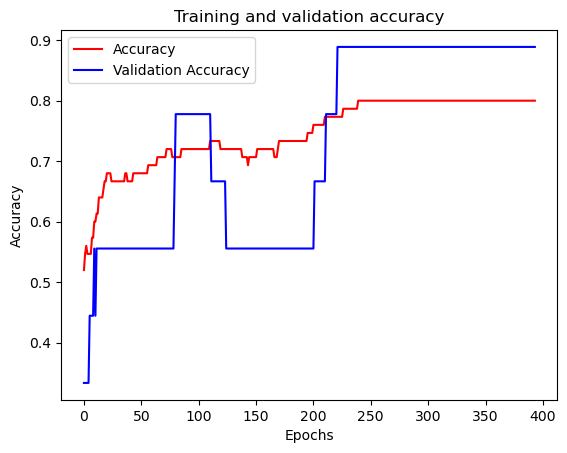

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = [*range(len(acc))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

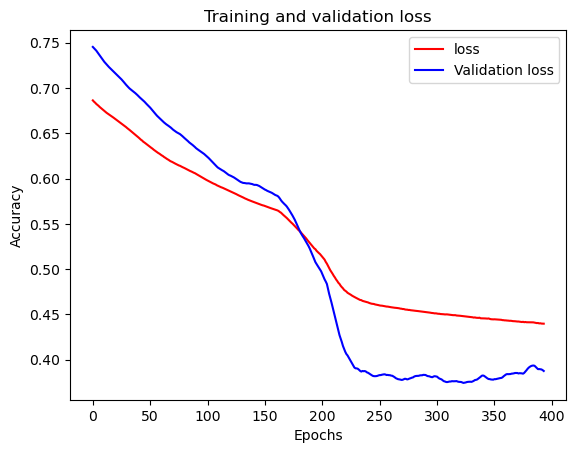

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["loss", "Validation loss"])
plt.show()

### KNN voisin

In [17]:
from sklearn.neighbors import KNeighborsClassifier

acc=0
bestN_neighbors=1

X_valKNN, X_testKNN = train_test_split(X_test, test_size=0.5, random_state=42)
y_valKNN, y_testKNN = train_test_split(y_test, test_size=0.5, random_state=42)


for i in range (1,X_testKNN.shape[0]+1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_valKNN)
    matriceConfusion = classification_report(y_valKNN, y_pred, output_dict=True)
    
    precision_class_0 = matriceConfusion['0']['precision']
    precision_class_1 = matriceConfusion['1']['precision']
    
    avg_precision = (precision_class_0 + precision_class_1) / 2
    
    if avg_precision > acc:
        bestN_neighbors = i
        acc = avg_precision
        
knn_model = KNeighborsClassifier(n_neighbors=bestN_neighbors)
knn_model.fit(X_train, y_train)
    
y_pred = knn_model.predict(X_testKNN)
print(classification_report(y_testKNN, y_pred, target_names=target_names))

correlation, p_value = pearsonr(y_testKNN, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_testKNN, y_pred))

              precision    recall  f1-score   support

       Lepen       0.83      1.00      0.91         5
      Macron       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Corrélation entre les valeurs réelles et prédites : 0.8164965809277259
P-value associée : 0.003949772803445343
R-value : 0.6


### LCA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
correlation, p_value = pearsonr(y_test, y_pred)
print("Corrélation entre les valeurs réelles et prédites :", correlation)
print("P-value associée :", p_value)
print("R-value :", r2_score(y_test, y_pred))

              precision    recall  f1-score   support

       Lepen       0.88      0.78      0.82         9
      Macron       0.82      0.90      0.86        10

    accuracy                           0.84        19
   macro avg       0.85      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19

Corrélation entre les valeurs réelles et prédites : 0.6854365268376296
P-value associée : 0.001199285777239622
R-value : 0.3666666666666667


### PCA

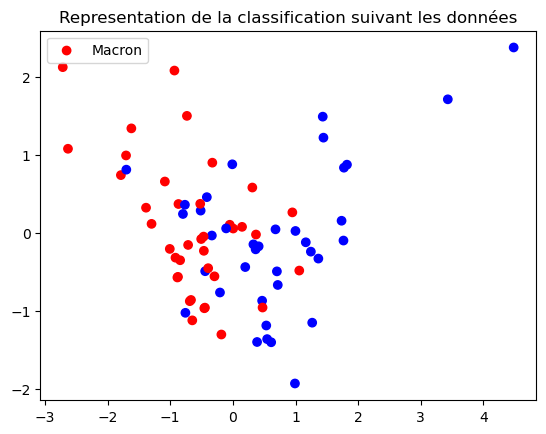

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


plt.figure()

plt.scatter(X_pca[:,0], X_pca[:,1], color=['red' if x <= 0.5 else 'blue' for x in y_train])
plt.title('Representation de la classification suivant les données')
plt.legend(['Macron', 'Le Pen'])
plt.show()